In [1]:
%run pylib/fermi_sources

show("""# Study properties of the "X" sources""")
show_date()

fs_data = FermiSources('files/fermi_sources_v2.csv')

unid_data_file ='files/unid_table.csv' 
unid = pd.read_csv(unid_data_file, index_col=0)
unk = unid.query('category=="X"').copy()
unk.drop(columns='category ra dec'.split(), inplace=True)
show(f"""* Load classifier results for the {len(unid)} unid from `{unid_data_file}`
* Select the {len(unk)} "X" guys for study""")


from utilities.catalogs import *
with capture_hide("""Load UW, 4FGL-DR4 catalogs to look up spectral functions""") as cat:
    fgl = Fermi4FGL()
    uw  = UWcat('uw1410')
show(cat)
uw.index = uw.jname


# Study properties of the "X" sources

<h5 style="text-align:right"> 2023-06-05 12:30</h5>

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6239 with criteria 'delta<0.2 & curvature<0.9'

* Load classifier results for the 1870 unid from `files/unid_table.csv`
* Select the 456 "X" guys for study

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f944245f910>

In [19]:
np.arange(100)[slice(10,20)]
unk.iloc[slice(10,12)]

,log_nbb,pindex,curvature,log_e0,abs_sin_b,log_eflux,ts,r95,glat,uw_name
name,,,,,,,,,,
4FGL J0137.3-3239,0.00000,2.279423,0.512949,3.122011,0.980351,-12.173298,30.075639,0.126823,-78.623222,J0137.3-3240
4FGL J0139.5-2228,0.30103,1.921980,0.512123,3.282256,0.978706,-11.793114,200.616689,0.053561,-78.154830,J0139.4-2228


<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f940ddc5490>
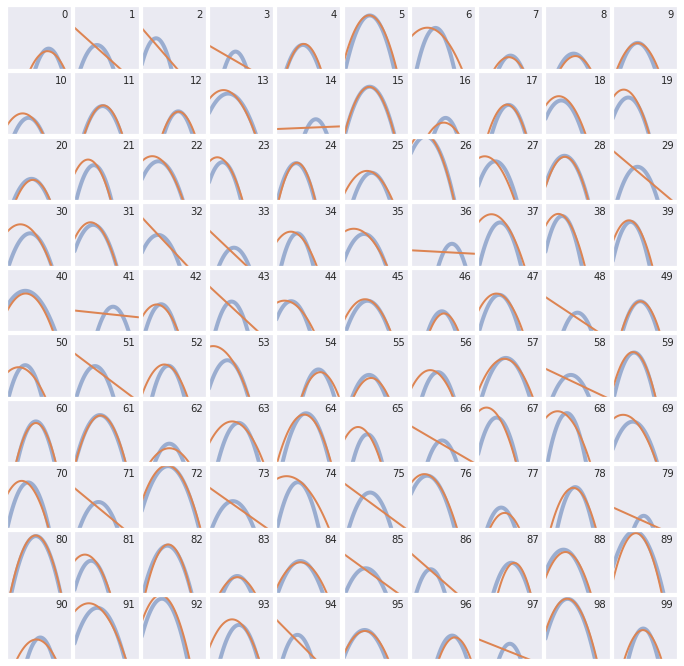

In [20]:
def plot_seds(df, start=0):
    """Blue: uw1410, red 4FGL-DR4
    """
    # df has 4FGL name index
    # df.uw_name is UW jnames
    dfsel = df.iloc[slice(start,100)]
    sfcat = fgl.loc[dfsel.index].specfunc
    sfuw  =  uw.loc[dfsel.uw_name].specfunc
    
    fig, axx = plt.subplots(ncols=10, nrows=10, figsize=(12,12), sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    for j, (ax, f, g), in enumerate(zip(axx.flatten(), sfuw, sfcat)):
        f.sed_plot(ax=ax, plot_kw=dict(lw=4, alpha=0.5))
        g.sed_plot(ax=ax)
        ax.set(xticks=[], yticks=[], xlabel='', ylabel='', ylim=(0.05,5),)
        ax.text(0.95,0.95, str(start+j), transform=ax.transAxes, fontsize=10, ha='right',va='top')
    return fig

show(plot_seds(unk), caption=plot_seds.__doc__)

In [ ]:
show(f"""## First 100/{len(unk)} "X" spectra""")
show_seds(unk)

### Second 100

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f941b01abe0>
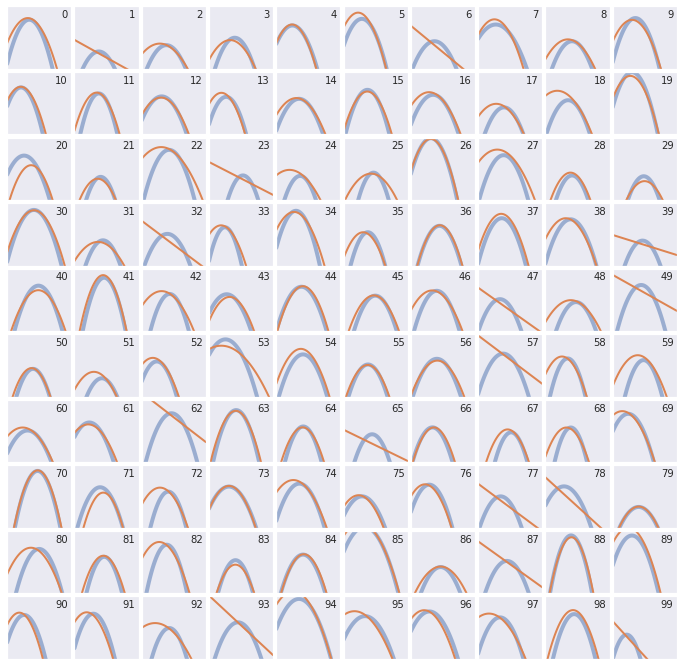

In [10]:
show(f"""### Second 100""")
show(plot_seds(unk.iloc[100:]))